### Import Package

In [49]:
import numpy as np
import pandas as pd
import sys
import time
import random

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

### ==============================

In [57]:
class Fitness:
    def __init__(self, X, y, classifier):
        self.data = X
        self.label = y
        self.classifier = classifier
        self.dim = len(X.columns)
        
        self.subset = []
        self. fit = 0
        
    def calculate(self, subset):
        try :
            # copy dataset
            df = self.data.copy()

            # get feature list
            feature = df.columns
            
            # create subset from dataset
            for i in range(len(feature)):
                if subset[i] == 0:
                    df.drop(columns=feature[i], inplace=True)        
            self.subset = df
            
        except :
            print('subset length and dataset features not same')
            
        else : 
            X = df
            y = self.label
            
            acc = cross_val_score(self.classifier, X, y)
            
            a = 0.8
            b = 0.2
            
            # dari penelitian BAI JI
            fit = (a*(1 - acc.mean())) + (b*(len(X.columns)/len(self.data.columns)))
            # print(f"Fit = ({a} * {1 - acc.mean()}) + {b} * ({len(X.columns)} / {len(self.data.columns)}) = {fit}")
            self.fit = fit
            
            return fit

In [58]:
class solution:
    def __init__(self):
        self.best = 0
        self.convergence = []
        self.optimizer = ""
        self.startTime = 0
        self.endTime = 0
        self.executionTime = 0
        self.dim = 0
        self.popnum = 0
        self.detail = ''

In [59]:
def BPSO(objf, dim, PopSize, iters, seeds=1):
    # PSO parameters
    wMax = 0.9
    wMin = 0.4
    c1 = 2.1
    c2 = 1.9

    s = solution()
    # Initializations

    # Random seed
    np.random.seed(seeds)
    random.seed(seeds)

    vel = np.zeros((PopSize, dim))

    pBestScore = np.zeros(PopSize)
    pBestScore.fill(float("inf"))

    pBest = np.zeros((PopSize, dim))
    gBest = np.zeros(dim)

    gBestScore = float("inf")

    pos = np.zeros((PopSize, dim))

    # initiakize random and calculate fitness
    for i in range(PopSize):
        for j in range(dim):
            pos[i, j] = np.random.randint(0, 2)

    for i in range(0, PopSize):
        fitness = objf.calculate(pos[i, :])

        if pBestScore[i] > fitness :
            pBestScore[i] = fitness
            pBest[i, :] = pos[i, :].copy()

        if gBestScore > fitness :
            gBestScore = fitness
            gBest = pos[i, :].copy()

    convergence_curve = np.zeros(iters)
    
    ############################################
    print('BPSO is optimizing')

    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")

    w = wMax
    for l in range(0, iters):
        
        # update pos + vel
        for i in range(0, PopSize):
            for j in range(0, dim):

                r1 = random.random()
                r2 = random.random()
                vel[i, j] = (
                    w * vel[i, j]
                    + c1 * r1 * (pBest[i, j] - pos[i, j])
                    + c2 * r2 * (gBest[j] - pos[i, j])
                )

                # update position
                rand = random.uniform(0, 1)    # randomizations
                sig = 1/(1 + np.exp(-vel[i, j]))
                if rand < sig:
                    pos[i, j] = 1
                else:
                    pos[i, j] = 0

            # check is zero or not
            xx = 0
            for x in range(0, len(pos[i, :])):
                if pos[i, x] == 1:
                    xx = 1

            if xx == 0:
                for j in range(dim):
                    pos[i, j] = (numpy.random.randint(0, 2))

        # Update the W of PSO
        w = wMax - (((wMax - wMin) / iters)*l)

        # check Fitness
        for i in range(0, PopSize):
            fitness = objf.calculate(pos[i, :])

            if pBestScore[i] > fitness :
                pBestScore[i] = fitness
                pBest[i, :] = pos[i, :].copy()

            if gBestScore > fitness :
                gBestScore = fitness
                gBest = pos[i, :].copy()

        convergence_curve[l] = gBestScore

        if l % 1 == 0:
            print(
                [
                    "At iteration "
                    + str(l + 1)
                    + " the best fitness is "
                    + str(gBestScore)
                ]
            )

    timerEnd = time.time()
    s.best = gBest
    s.endTime = time.strftime("%Y-%m-%d-%H-%M-%S")
    s.executionTime = timerEnd - timerStart
    s.convergence = convergence_curve
    s.optimizer = "BPSO"
    s.dim = dim
    s.popnum = PopSize
    
    plt.plot(s.convergence)

    return s

In [60]:
def subset_feature(dataset, subset):
    # copy dataset
    df = dataset.copy()

    # get feature list
    feature = df.columns

    # create subset from dataset
    for i in range(len(subset)):
        if subset[i] == 0:
            df.drop(columns=feature[i], inplace=True)

    return df

### ==========================================

## Import dataset

In [61]:
df = pd.read_csv('data/bcw.csv', index_col='id')

X = df.drop(columns="diagnosis")
y = df['diagnosis']

# train test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [63]:
# classifier untuk fitness function
knn = KNeighborsClassifier()

#Inisialisasi fitness function
fitness = Fitness(X_train, y_train, knn)

BPSO is optimizing
['At iteration 1 the best fitness is 0.1380219780219781']
['At iteration 2 the best fitness is 0.13347985347985353']
['At iteration 3 the best fitness is 0.13347985347985353']
['At iteration 4 the best fitness is 0.13347985347985353']
['At iteration 5 the best fitness is 0.11347985347985351']
['At iteration 6 the best fitness is 0.11347985347985351']
['At iteration 7 the best fitness is 0.11347985347985351']
['At iteration 8 the best fitness is 0.11106227106227104']
['At iteration 9 the best fitness is 0.11106227106227104']
['At iteration 10 the best fitness is 0.09728937728937731']
['At iteration 11 the best fitness is 0.09728937728937731']
['At iteration 12 the best fitness is 0.09413919413919425']
['At iteration 13 the best fitness is 0.09413919413919425']
['At iteration 14 the best fitness is 0.09413919413919425']
['At iteration 15 the best fitness is 0.09413919413919425']
['At iteration 16 the best fitness is 0.09413919413919425']
['At iteration 17 the best fitn

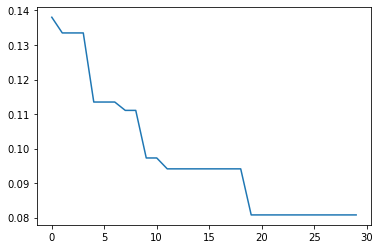

In [64]:
# Seleksi fitur BPSO
hasil = BPSO(fitness, len(X_train.columns), 10, 30)

In [67]:
# hasil seleksi fitur
X_train_new = subset_feature(X_train, hasil.best)
X_test_new = subset_feature(X_test, hasil.best)

X_train_new

,concave points_mean,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst
id,,,,,
845636,0.03323,33.88,123.80,0.11810,0.2948
87139402,0.03700,15.64,86.97,0.13850,0.2827
905190,0.01867,27.01,91.63,0.09402,0.2488
907914,0.09711,27.57,125.40,0.14190,0.2866
852781,0.07731,27.26,139.90,0.13380,0.2341
...,...,...,...,...,...
854941,0.02923,22.81,84.46,0.09701,0.1987
905686,0.02179,27.21,85.09,0.14260,0.3075
9112594,0.01762,31.88,91.06,0.12180,0.2306


### Perbandingan Akurasi (Algoritma KNN)

In [71]:
# tanpa seleksi fitur (30 Fitur)

# inisialisasi model
model = KNeighborsClassifier(n_neighbors=5)

# train model
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

# accuracy score
acc = accuracy_score(y_test, pred)
acc

0.9122807017543859

In [72]:
# tanpa seleksi fitur (5 Fitur)

# inisialisasi model
model = KNeighborsClassifier(n_neighbors=5)

# train model
model.fit(X_train_new, y_train)

# predict
pred = model.predict(X_test_new)

# accuracy score
acc = accuracy_score(y_test, pred)
acc

0.9385964912280702